In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [18]:
from sympy import diff, exp, Symbol, factorial

In [4]:
from time import time

In [5]:
def lagranz(x,y,t):
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1=p1*1; p2=p2*1   
            else: 
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z

In [6]:
def newton(x, y, t):
    value = 0
    norm = 1
    for i in range(len(y)):
        for j in range(i):
            norm *= (t - x[j])
        value += (coef(x, y, i) * norm)
        norm = 1
    return value

def coef(x, y, n):
    denom = 1
    num = y[n]
    norm = 1
    
    if(n == 0):
        return num
    
    for i in range(n):
        for j in range(i):
            norm *= (x[n] - x[j])
        denom *= (x[n]-x[i])
        num -= (coef(x, y, i) * norm)
        norm = 1
    
    return (num/denom)

In [7]:
def omega(X, t):
    omega = 1
    for i in X:
        omega *= (t - i)
    return abs(omega)

In [8]:
def splitDiff(X, Y, t):
    splitSum = 0
    for j in range(len(Y)):
        denom = 1
        for l in range(len(X)):
            if(l != j):
                denom *= (X[j] - X[l])
        splitSum += Y[j]/denom
    return splitSum

In [9]:
def chebNode(a, b, n):
    return [(0.5)*(b+a)+(0.5)*(b-a)*np.cos(((2*k+1)*(np.pi))/(2*(n+1))) for k in range(n)]

In [19]:
def FLPlot(n):
    X = np.linspace(-1, 2, n)
    Y = [np.exp(i) for i in X]
    
    newX = np.linspace(np.min(X), np.max(X), 100)
    newY = [lagranz(X, Y, i) for i in newX]
    
    #----ПОГРЕШНОСТЬ----------------
    x = Symbol("x")
    M = 0
    for i in newX:
        mid = abs(diff(exp(x), x, (n+1)).subs(x, i))
        if(M < mid): M = mid
    K = (M/(factorial(n+1)))
    
    diffY = [K*omega(X, i) for i in newX]
    
    #----AlternativeFormПОГРЕШНОСТЬ--------
    AFdiffY = [omega(X, i)*splitDiff(X, Y, i) for i in newX]
    
    #----RealПОГРЕШНОСТЬ-------------------
    real_diffY = [abs(np.exp(i)-lagranz(X, Y, i)) for i in newX]
    
    #----ОТРИСОВКА-ГРАФИКОВ---------
    plt.plot(newX, np.exp(newX), "blue", label = "$e^x$") 
    plt.plot(newX, newY, "red", label = "$L_n(x)$")
    plt.plot(X, Y, "o", label = "$data$")
    plt.grid(True)
    plt.axis([-1, 2, 0, 10])
    plt.legend()
    plt.show()
    
    plt.plot(newX, diffY, "blue", label = "$TheorDiff$") 
    plt.plot(newX, real_diffY, "red", label = "$RealDiff$")
    plt.grid(True)
    plt.axis([-1, 2, 0, 0.1])
    plt.legend()
    plt.show()
    
    plt.plot(newX, AFdiffY, "blue", label = "$AFTheorDiff$") 
    plt.plot(newX, real_diffY, "red", label = "$RealDiff$")
    plt.grid(True)
    plt.axis([-1, 2, 0, 0.1])
    plt.legend()
    plt.show()

In [11]:
def FNPlot(n):
    tic = time()
    X = np.linspace(-1, 2, n)
    Y = [np.exp(i) for i in X]
    
    newX = np.linspace(np.min(X), np.max(X), 100)
    newY = [newton(X, Y, i) for i in newX]
    
    plt.plot(newX, np.exp(newX), "blue", label = "$e^x$")
    plt.plot(newX, newY, "green", label = "$N_n(x)$")
    plt.plot(X, Y, "o", label = "$data$")
    plt.grid(True)
    plt.axis([-1, 2, 0, 10])
    plt.legend()
    plt.show()
    toc = time()
    print("RunTime: ", toc - tic)

In [22]:
def chebLPlot(n):
    X = chebNode(-1, 2, n)
    Y = [np.exp(i) for i in X]
    
    newX = np.linspace(-1, 2, 100)
    newY = [lagranz(X, Y, i) for i in newX]
    
    #----ПОГРЕШНОСТЬ----------------
    x = Symbol("x")
    M = 0
    for i in newX:
        mid = abs(diff(exp(x), x, (n+1)).subs(x, i))
        if(M < mid): M = mid
    K = (M/(factorial(n+1)))
    
    diffY = [K*omega(X, i) for i in newX]
    
    #----AlternativeFormПОГРЕШНОСТЬ--------
    AFdiffY = [omega(X, i)*splitDiff(X, Y, i) for i in newX]
    
    #----RealПОГРЕШНОСТЬ-------------------
    real_diffY = [abs(np.exp(i)-lagranz(X, Y, i)) for i in newX]
    
    #----ОТРИСОВКА-ГРАФИКОВ-----------
    plt.plot(newX, np.exp(newX), "blue", label = "$e^x$") 
    plt.plot(newX, newY, "red", label = "$L_n(x)$")
    plt.plot(X, Y, "o", label = "$data$")
    plt.grid(True)
    plt.axis([-1, 2, 0, 10])
    plt.legend()
    plt.show()
    
    plt.plot(newX, diffY, "blue", label = "$TheorDiff$") 
    plt.plot(newX, real_diffY, "red", label = "$RealDiff$")
    plt.grid(True)
    plt.axis([-1, 2, 0, 0.1])
    plt.legend()
    plt.show()
    
    plt.plot(newX, AFdiffY, "blue", label = "$AFTheorDiff$") 
    plt.plot(newX, real_diffY, "red", label = "$RealDiff$")
    plt.grid(True)
    plt.axis([-1, 2, 0, 0.1])
    plt.legend()
    plt.show()

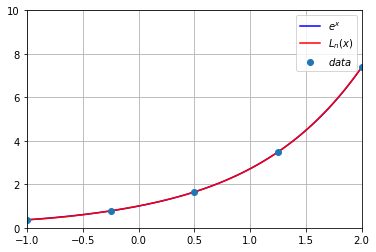

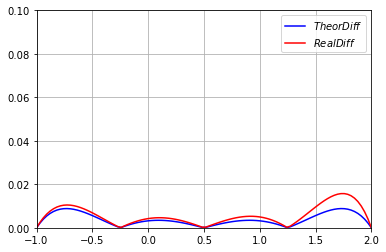

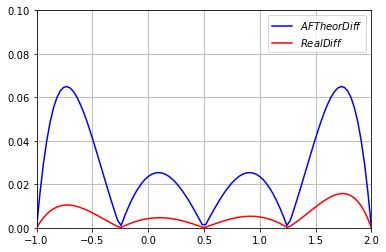

In [23]:
FLPlot(5)

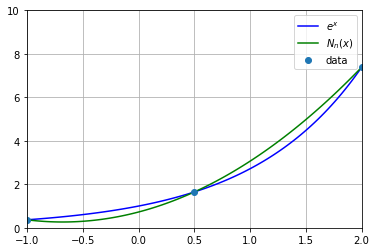

RunTime:  0.22201275825500488


In [30]:
FNPlot(3)

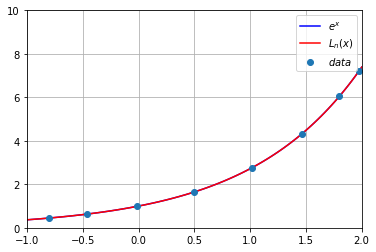

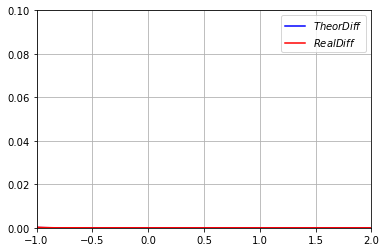

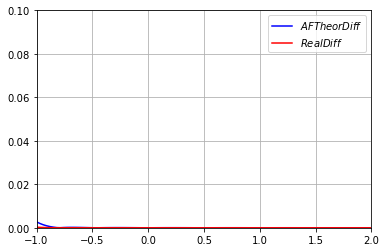

In [24]:
chebLPlot(8)

In [15]:
chebNode(-1, 2, 5)

[1.9488887394336025,
 1.5606601717798214,
 0.88822856765378111,
 0.11177143234621906,
 -0.56066017177982119]